### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
df = pd.read_csv("shopify.csv")
df[:5]

,month,ua_browser,ua_form_factor,page_type,location_city,referrer_source,total_sessions,total_bounce_rate,total_carts,total_checkouts,total_conversion,total_orders_placed,total_pageviews,total_visitors
0,2021-05,Safari,Desktop,Homepage,Brisbane,Search,1,0.0,0,0,0.0,0,7,1.0
1,2021-05,Safari,Desktop,Product,Sydney,Direct,1,1.0,0,0,0.0,0,1,1.0
2,2021-05,Safari,Desktop,Product,Caulfield South,Direct,1,1.0,0,0,0.0,0,1,1.0
3,2021-05,Safari,Desktop,Collection,Geneva,Direct,1,1.0,0,0,0.0,0,1,1.0
4,2021-05,Safari,Desktop,Product,NaN,Search,1,1.0,0,0,0.0,0,1,1.0


### Uses of Browsers to visit Store by Month

In [3]:
mb = df.groupby(["month", "ua_browser"])["ua_browser"].agg(["count"]).reset_index()
mb_p = mb.pivot_table(index = "ua_browser", columns = "month", values = "count")
mb_p

month,2021-05,2021-06,2021-07,2021-08,2021-09
ua_browser,,,,,
Android,NaN,NaN,1.0,1.0,15.0
Apple Mail,NaN,10.0,2.0,2.0,6.0
Chrome,335.0,1737.0,1355.0,2392.0,2187.0
Chrome Mobile,212.0,2024.0,1175.0,1602.0,1248.0
Chrome Mobile WebView,4.0,1033.0,30.0,34.0,48.0
Chrome Mobile iOS,55.0,609.0,257.0,348.0,298.0
Chromium,NaN,NaN,NaN,1.0,NaN
Edge,16.0,4.0,4.0,2.0,NaN
Edge Mobile,NaN,3.0,2.0,5.0,NaN


### Top Browsers to visit Store by Month

In [4]:
mbx = df.groupby(["month", "ua_browser"])["ua_browser"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
mbx.drop_duplicates(subset = "month", keep = "first", inplace = True)
mbx

,month,ua_browser,count
37,2021-06,Mobile Safari,4579
87,2021-08,Mobile Safari,2871
111,2021-09,Mobile Safari,2354
62,2021-07,Mobile Safari,2260
13,2021-05,Mobile Safari,341


### Use of Devices to visit Store by Month

In [5]:
d = df.groupby(["month", "ua_form_factor"])["ua_form_factor"].agg(["count"]).reset_index()
d_p = d.pivot_table(index = "ua_form_factor", columns = "month", values = "count")
d_p

month,2021-05,2021-06,2021-07,2021-08,2021-09
ua_form_factor,,,,,
Desktop,547,2533,1813,3161,2825
Mobile,750,11371,4152,5440,4505
Other,50,586,360,430,320
Tablet,15,143,82,137,109


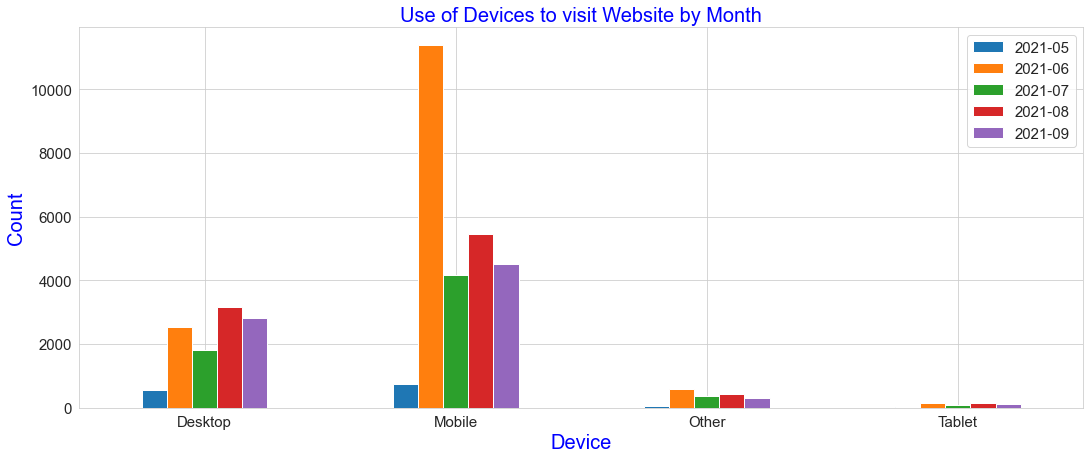

In [6]:
sns.set_style("whitegrid")
d_p.plot(kind = "bar", figsize = (18, 7))
plt.title("Use of Devices to visit Website by Month", size = 20, color = "blue")
plt.xlabel("Device", size = 20, color = "blue")
plt.ylabel("Count", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

### Page Type to Visit Store by Months

In [7]:
pt = df.groupby(["month", "page_type"])["page_type"].agg(["count"]).reset_index()
pt =pt.pivot_table(index = "page_type", columns = "month", values = "count")
pt

month,2021-05,2021-06,2021-07,2021-08,2021-09
page_type,,,,,
App Generated,1.0,NaN,NaN,NaN,NaN
Blog Article,48.0,47.0,48.0,39.0,18.0
Blog Index,11.0,6.0,10.0,54.0,19.0
Cart,1.0,3.0,2.0,10.0,6.0
Checkout,6.0,39.0,47.0,137.0,83.0
Collection,127.0,123.0,138.0,230.0,1116.0
Custom Page,80.0,149.0,161.0,221.0,154.0
Customer Account,5.0,2.0,9.0,17.0,27.0
Homepage,536.0,5244.0,1712.0,2981.0,1772.0


### Top Traffic from Cities to Store by Month

In [8]:
lc = df.groupby(["month", "location_city"])["location_city"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
lc.drop_duplicates(subset = "month", keep = "first", inplace = True)
lc

,month,location_city,count
867,2021-06,Sydney,2437
1999,2021-08,Sydney,1582
2628,2021-09,Sydney,1460
1023,2021-07,Brisbane,1057
37,2021-05,Brisbane,349


### Referrer Source to Store by Month

In [9]:
rs = df.groupby(["month", "referrer_source"])["referrer_source"].agg(["count"]).reset_index()
rsp = rs.pivot_table(index = "referrer_source", columns = "month", values = "count")
rsp

month,2021-05,2021-06,2021-07,2021-08,2021-09
referrer_source,,,,,
Direct,595.0,4127.0,1875.0,2855.0,2304.0
Email,1.0,5.0,NaN,2.0,1.0
Search,660.0,7468.0,3915.0,5271.0,4614.0
Social,64.0,2454.0,56.0,93.0,86.0
Unknown,42.0,578.0,561.0,947.0,754.0


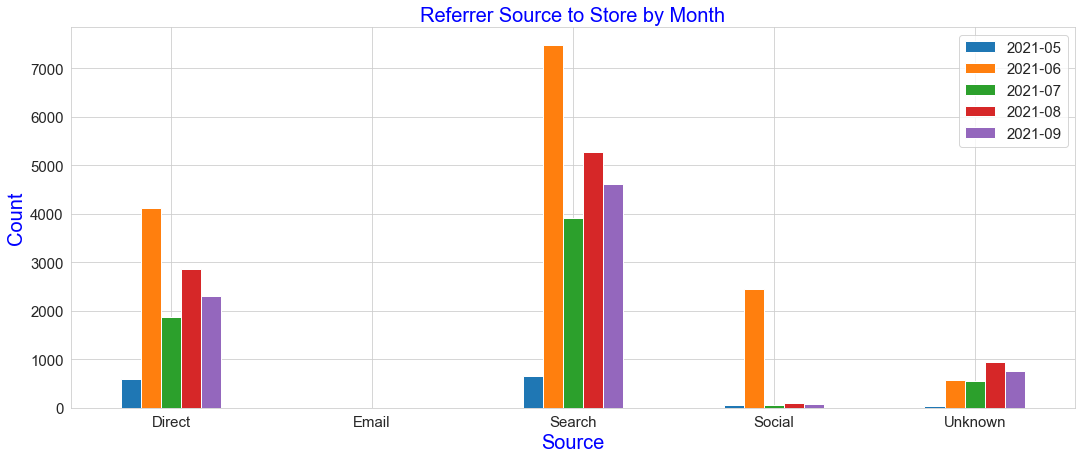

In [10]:
rsp.plot(kind = "bar", figsize = (18, 7))
plt.title("Referrer Source to Store by Month", size = 20, color = "blue")
plt.xlabel("Source", size = 20, color = "blue")
plt.ylabel("Count", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.legend(prop={"size":15})
plt.show()

### Total Sessions to visit Store by Month

In [11]:
df["total_sessions"] = df["total_sessions"].replace({"0s": 0})
df["total_sessions"] =  df["total_sessions"].astype("int")
sm = df.groupby("month")["total_sessions"].agg(["sum"])
sm

,sum
month,
2021-05,2542
2021-06,17046
2021-07,8439
2021-08,11662
2021-09,8901


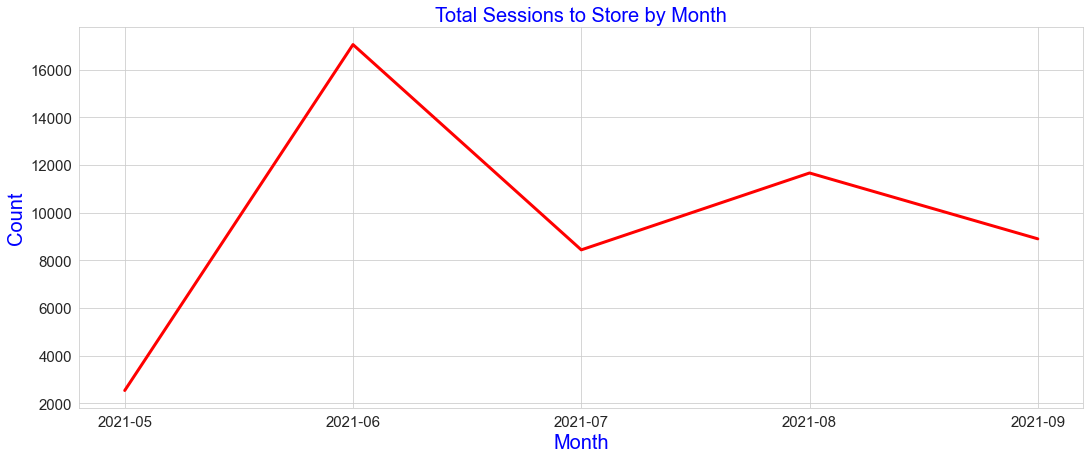

In [12]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = sm.index, y = "sum", data = sm, color = "red", linewidth = 3)
plt.title("Total Sessions to Store by Month", size = 20, color = "blue")
plt.xlabel("Month", size = 20, color = "blue")
plt.ylabel("Count", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Bounce to Store by Month

In [13]:
br = df.groupby("month")["total_bounce_rate"].agg(["mean", "count"])
br

,mean,count
month,,
2021-05,0.657926,1362
2021-06,0.828184,14633
2021-07,0.739649,6407
2021-08,0.660586,9168
2021-09,0.687681,7759


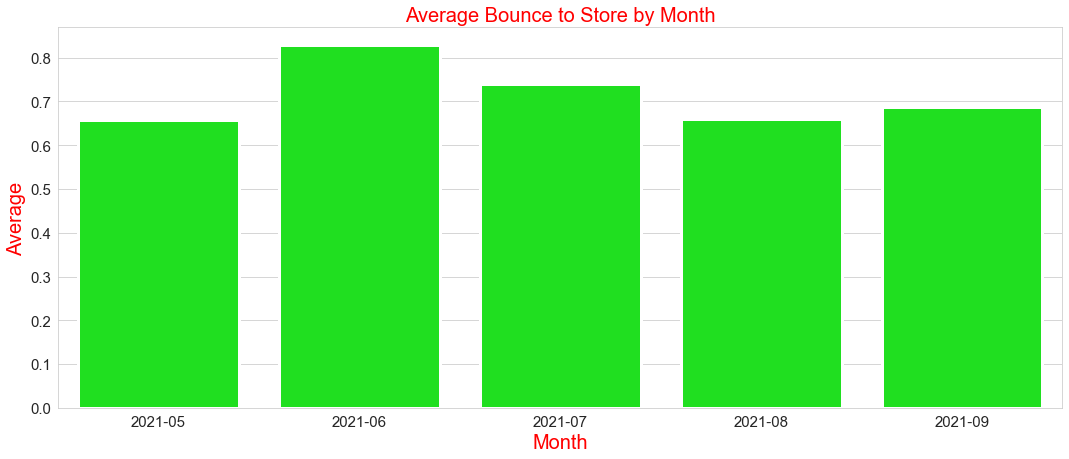

In [14]:
plt.figure(figsize = (18, 7))
sns.barplot(x = br.index, y = "mean", data = br, color = "lime", linewidth = 3)
plt.title("Average Bounce to Store by Month", size = 20, color = "red")
plt.xlabel("Month", size = 20, color = "red")
plt.ylabel("Average", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Carts in Store by Month

In [15]:
c = df.groupby("month")["total_carts"].agg(["sum"])
c

,sum
month,
2021-05,40
2021-06,249
2021-07,220
2021-08,509
2021-09,458


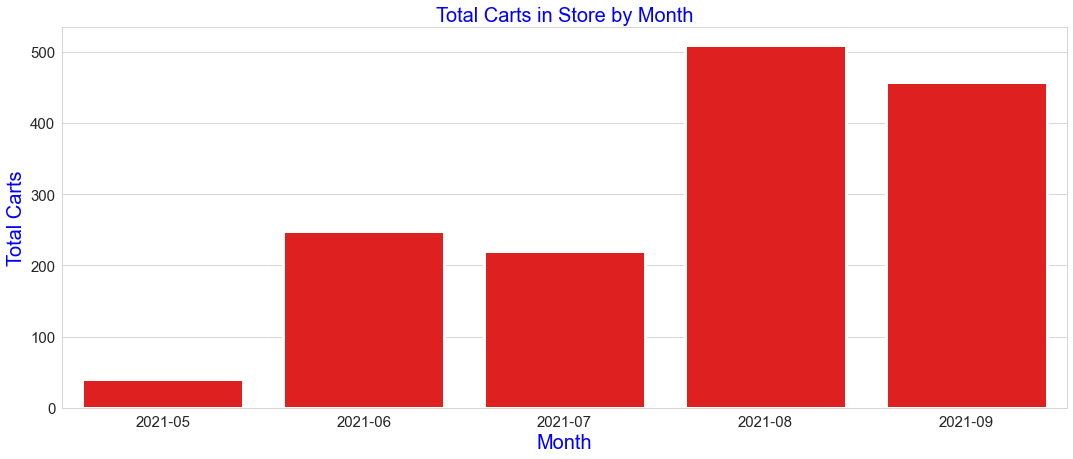

In [16]:
plt.figure(figsize = (18, 7))
sns.barplot(x = c.index, y = "sum", data = c, color = "red", linewidth = 3)
plt.title("Total Carts in Store by Month", size = 20, color = "blue")
plt.xlabel("Month", size = 20, color = "blue")
plt.ylabel("Total Carts", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Checkouts in store by month

In [17]:
tc = df.groupby("month")["total_checkouts"].agg(["sum"])
tc

,sum
month,
2021-05,23
2021-06,147
2021-07,105
2021-08,212
2021-09,181


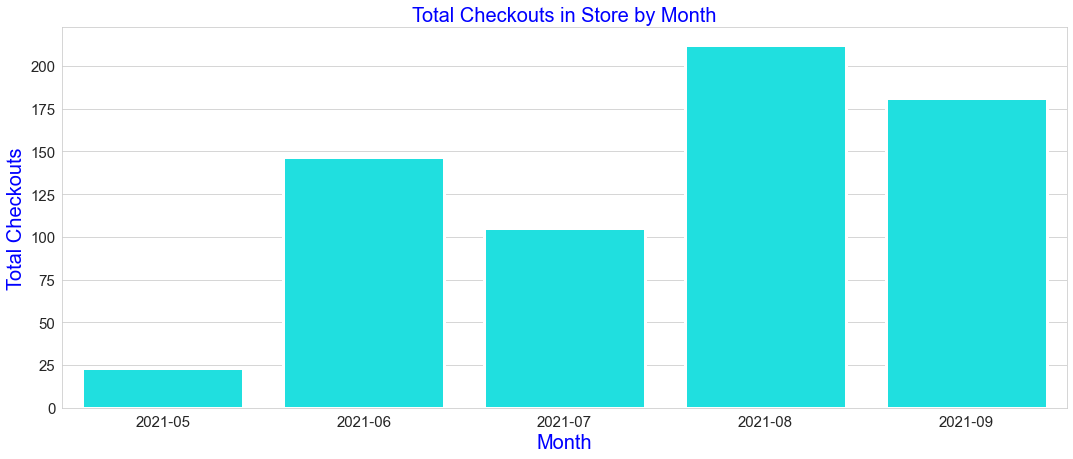

In [18]:
plt.figure(figsize = (18, 7))
sns.barplot(x = tc.index, y = "sum", data = tc, color = "cyan", linewidth = 3)
plt.title("Total Checkouts in Store by Month", size = 20, color = "blue")
plt.xlabel("Month", size = 20, color = "blue")
plt.ylabel("Total Checkouts", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Conversions in store by month

In [19]:
tcon = df.groupby("month")["total_conversion"].agg(["sum"])
tcon

,sum
month,
2021-05,3.00000
2021-06,30.40026
2021-07,37.20958
2021-08,69.52067
2021-09,72.48569


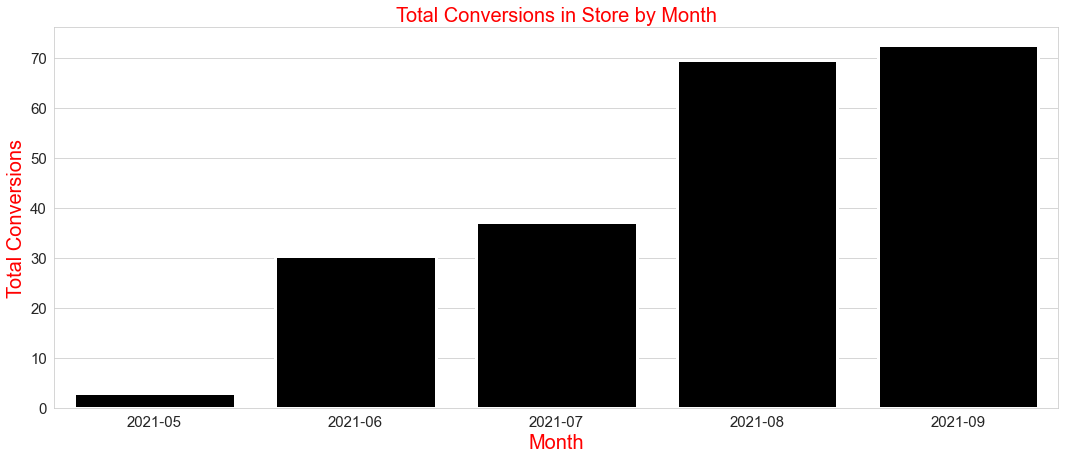

In [20]:
plt.figure(figsize = (18, 7))
sns.barplot(x = tcon.index, y = "sum", data = tcon, color = "black", linewidth = 3)
plt.title("Total Conversions in Store by Month", size = 20, color = "red")
plt.xlabel("Month", size = 20, color = "red")
plt.ylabel("Total Conversions", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Orders Places in Store by Month

In [21]:
to = df.groupby("month")["total_orders_placed"].agg(["sum"])
to

,sum
month,
2021-05,3
2021-06,36
2021-07,45
2021-08,84
2021-09,79


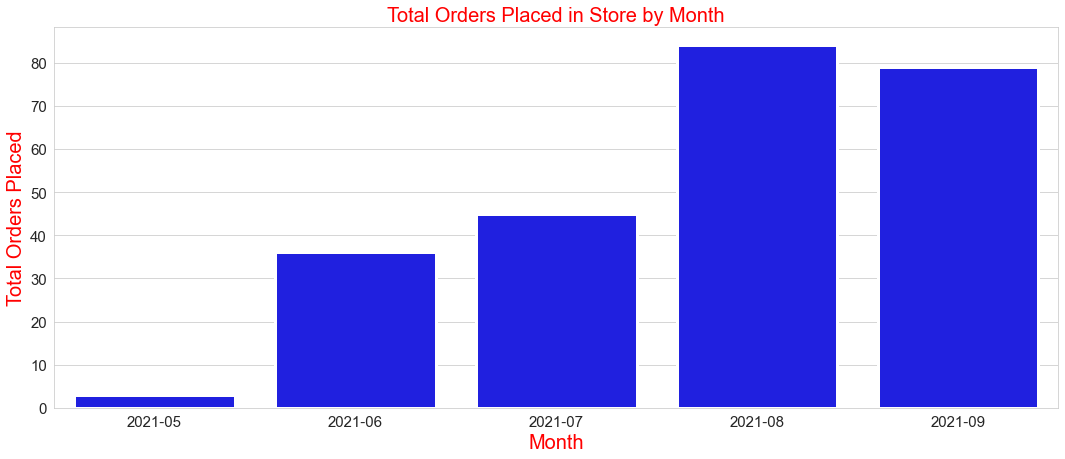

In [22]:
plt.figure(figsize = (18, 7))
sns.barplot(x = to.index, y = "sum", data = to, color = "blue", linewidth = 3)
plt.title("Total Orders Placed in Store by Month", size = 20, color = "red")
plt.xlabel("Month", size = 20, color = "red")
plt.ylabel("Total Orders Placed", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Page Views in Store by Month

In [23]:
tpv = df.groupby("month")["total_pageviews"].agg(["sum"])
tpv

,sum
month,
2021-05,6955
2021-06,27896
2021-07,19002
2021-08,28889
2021-09,18994


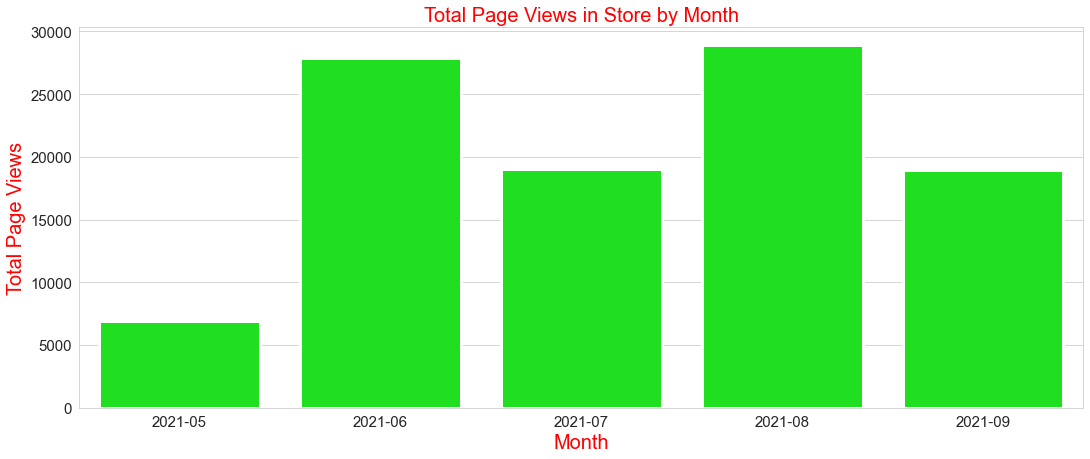

In [24]:
plt.figure(figsize = (18, 7))
sns.barplot(x = tpv.index, y = "sum", data = tpv, color = "lime", linewidth = 3)
plt.title("Total Page Views in Store by Month", size = 20, color = "red")
plt.xlabel("Month", size = 20, color = "red")
plt.ylabel("Total Page Views", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total visitors on store by Months

In [25]:
tv = df.groupby("month")["total_visitors"].agg(["sum"])
tv

,sum
month,
2021-05,2358.0
2021-06,16364.0
2021-07,7917.0
2021-08,10893.0
2021-09,8493.0


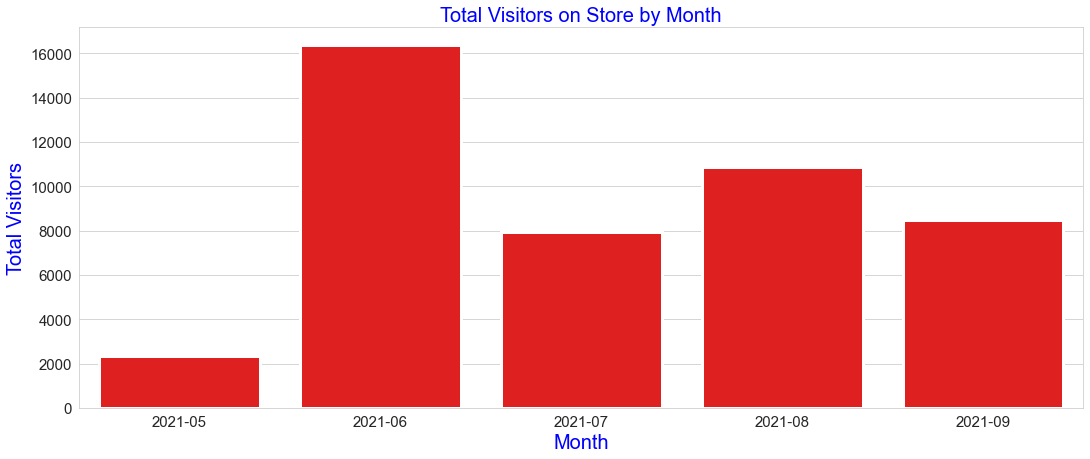

In [26]:
plt.figure(figsize = (18, 7))
sns.barplot(x = tv.index, y = "sum", data = tv, color = "red", linewidth = 3)
plt.title("Total Visitors on Store by Month", size = 20, color = "blue")
plt.xlabel("Month", size = 20, color = "blue")
plt.ylabel("Total Visitors", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Top Location City of Store by Browser

In [27]:
bc = df.groupby(["location_city", "ua_browser"])["ua_browser"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
bc.drop_duplicates(subset = "ua_browser", keep = "first", inplace = True)
bc

,location_city,ua_browser,count
0,Sydney,Mobile Safari,2157
3,Sydney,Chrome,1354
4,Brisbane,Chrome Mobile,1177
11,Brisbane,Facebook,552
15,Brisbane,Safari,335
16,Sydney,Other,318
19,Brisbane,Samsung Internet,309
22,Brisbane,Chrome Mobile iOS,268
27,Sydney,Chrome Mobile WebView,222
36,Council Bluffs,HeadlessChrome,130


### Top Cities to visit store by Devices

In [28]:
dvc = df.groupby(["location_city", "ua_form_factor"])["ua_form_factor"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
dvc.drop_duplicates(subset = "ua_form_factor", keep = "first", inplace = True)
dvc

,location_city,ua_form_factor,count
291,Brisbane,Mobile,4538
1803,Sydney,Desktop,1745
1805,Sydney,Other,318
293,Brisbane,Tablet,102


### Top city to visit store by Page Type 

In [29]:
pvs = df.groupby(["location_city", "page_type"])["page_type"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
pvs.drop_duplicates(subset = "page_type", keep = "first", inplace = True)
pvs

,location_city,page_type,count
2010,Sydney,Product,4135
317,Brisbane,Homepage,2443
314,Brisbane,Collection,418
315,Brisbane,Custom Page,276
310,Brisbane,Blog Article,80
319,Brisbane,Search,79
313,Brisbane,Checkout,61
311,Brisbane,Blog Index,28
316,Brisbane,Customer Account,23
312,Brisbane,Cart,6


### Top City to visit store by Referrer Source 

In [30]:
rs = df.groupby(["location_city", "referrer_source"])["referrer_source"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
rs.drop_duplicates(subset = "referrer_source", keep = "first", inplace = True)
rs

,location_city,referrer_source,count
1999,Sydney,Search,4035
307,Brisbane,Direct,1888
310,Brisbane,Social,557
2001,Sydney,Unknown,380
308,Brisbane,Email,4


### Top 10 Total Sessions to visit store by City

In [31]:
sc = df.groupby("location_city")["total_sessions"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
sc = sc[:10]
sc

,location_city,sum
175,Brisbane,9868
1092,Sydney,7471
733,Melbourne,4822
10,Adelaide,2242
909,Perth,2033
311,Council Bluffs,605
225,Canberra,451
827,New York,344
663,Lockport,336
883,Oxford House,264


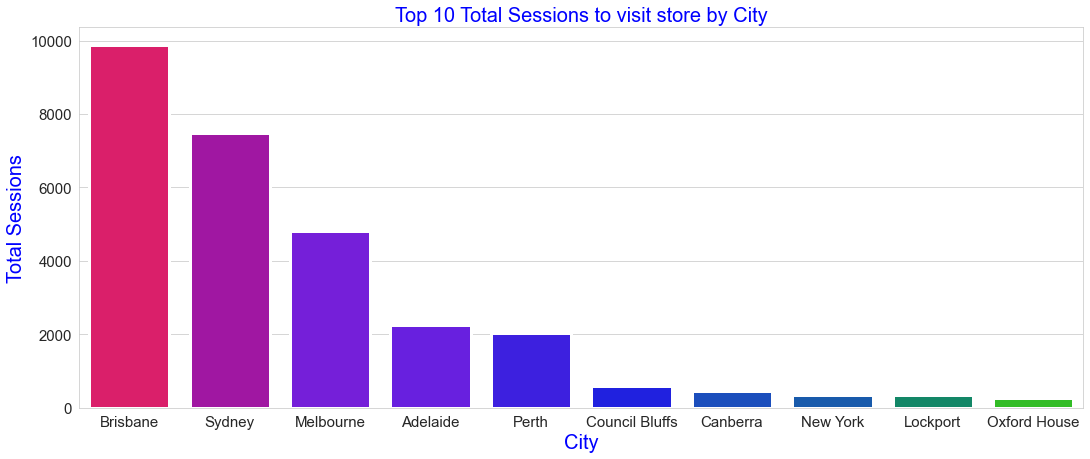

In [32]:
plt.figure(figsize = (18, 7))
sns.barplot(x = sc["location_city"], y = "sum", data = sc, palette = "prism", linewidth = 3)
plt.title("Top 10 Total Sessions to visit store by City", size = 20, color = "blue")
plt.xlabel("City", size = 20, color = "blue")
plt.ylabel("Total Sessions", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Top 10 Cities by Bounce

In [33]:
brc = df.groupby("location_city")["total_bounce_rate"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
brc = brc[:10]
brc

,location_city,count
1092,Sydney,6646
175,Brisbane,6429
733,Melbourne,4331
10,Adelaide,2043
909,Perth,1833
225,Canberra,413
249,Caulfield South,232
883,Oxford House,214
311,Council Bluffs,177
663,Lockport,171


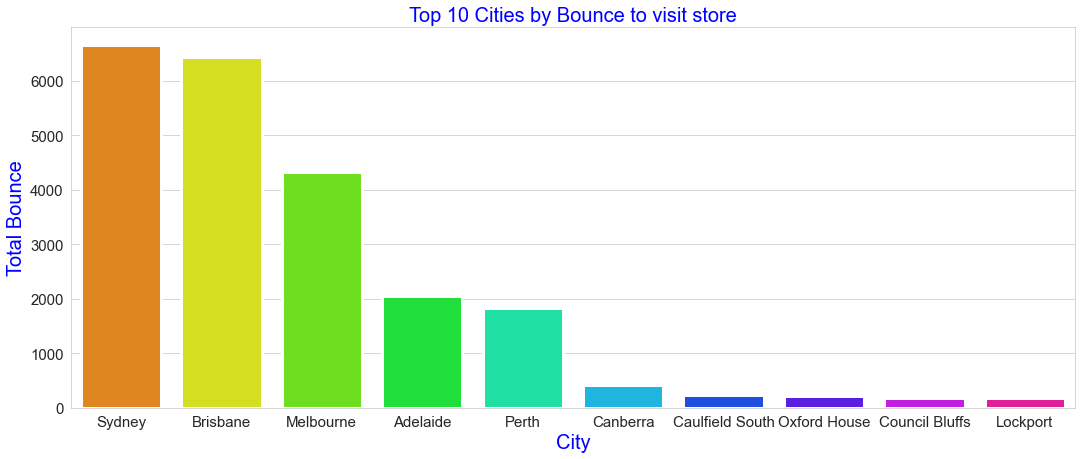

In [34]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "count", data = brc, palette = "hsv", linewidth = 3)
plt.title("Top 10 Cities by Bounce to visit store", size = 20, color = "blue")
plt.xlabel("City", size = 20, color = "blue")
plt.ylabel("Total Bounce", size = 20, color = "blue")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Carts in Store by Top 10 Cities

In [35]:
cc = df.groupby("location_city")["total_carts"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
cc = cc[:10]
cc

,location_city,sum
1092,Sydney,299
175,Brisbane,271
733,Melbourne,167
909,Perth,67
10,Adelaide,61
225,Canberra,17
249,Caulfield South,15
725,Mascot,7
529,Hobart,6
185,Brunswick,6


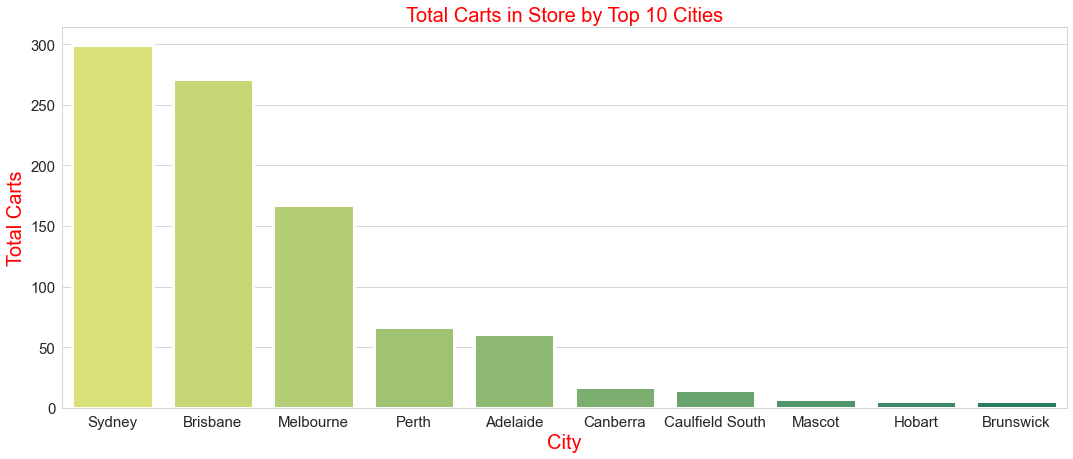

In [36]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = cc, palette = "summer_r", linewidth = 3)
plt.title("Total Carts in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Carts", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Checkouts in Store by Top 10 Cities

In [37]:
cs = df.groupby("location_city")["total_checkouts"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
cs = cs[:10]
cs

,location_city,sum
175,Brisbane,142
1092,Sydney,127
733,Melbourne,72
909,Perth,27
10,Adelaide,25
916,Pimpama,6
404,Elwood,5
249,Caulfield South,5
725,Mascot,5
185,Brunswick,4


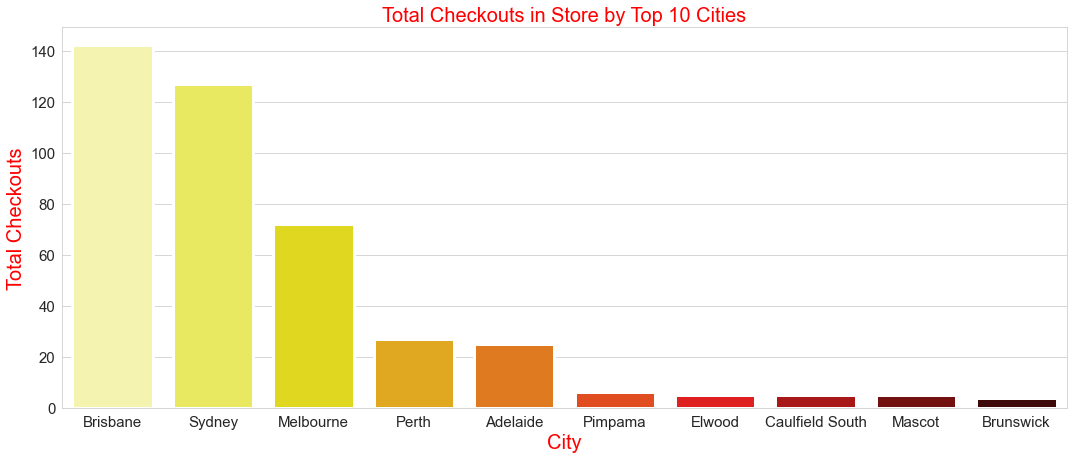

In [38]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = cs, palette = "hot_r", linewidth = 3)
plt.title("Total Checkouts in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Checkouts", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Conversion in Store by Top 10 Cities

In [39]:
cns = df.groupby("location_city")["total_conversion"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
cns = cns[:10]
cns

,location_city,sum
175,Brisbane,48.39518
1092,Sydney,40.46189
733,Melbourne,18.55555
909,Perth,8.50000
10,Adelaide,7.16666
225,Canberra,2.50000
916,Pimpama,2.25000
306,Coorparoo,2.00000
828,Newcastle,2.00000
1116,Thornbury,2.00000


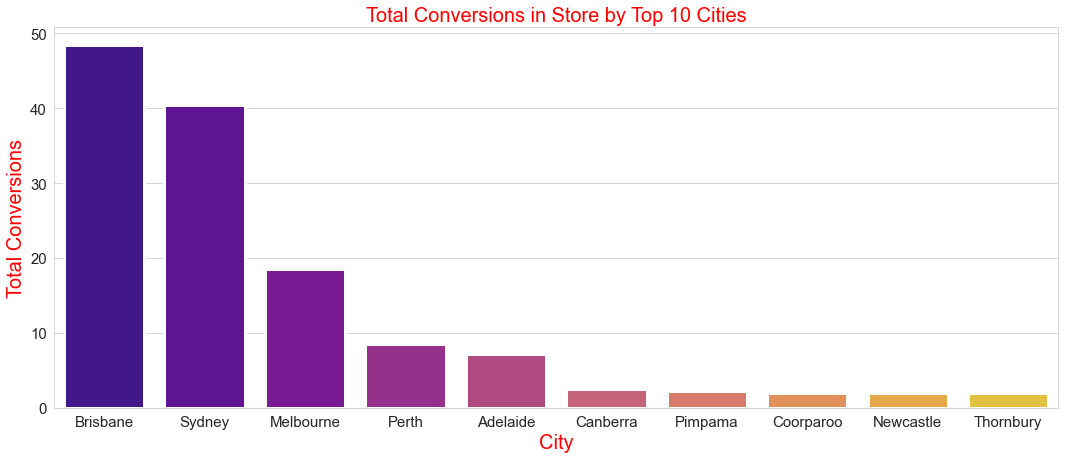

In [40]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = cns, palette = "plasma", linewidth = 3)
plt.title("Total Conversions in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Conversions", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Orders Placed on Store by top 10 cities

In [41]:
oc = df.groupby("location_city")["total_orders_placed"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
oc = oc[:10]
oc

,location_city,sum
175,Brisbane,68
1092,Sydney,45
733,Melbourne,20
10,Adelaide,9
909,Perth,9
225,Canberra,3
916,Pimpama,3
588,Kellyville,2
725,Mascot,2
79,Balwyn North,2


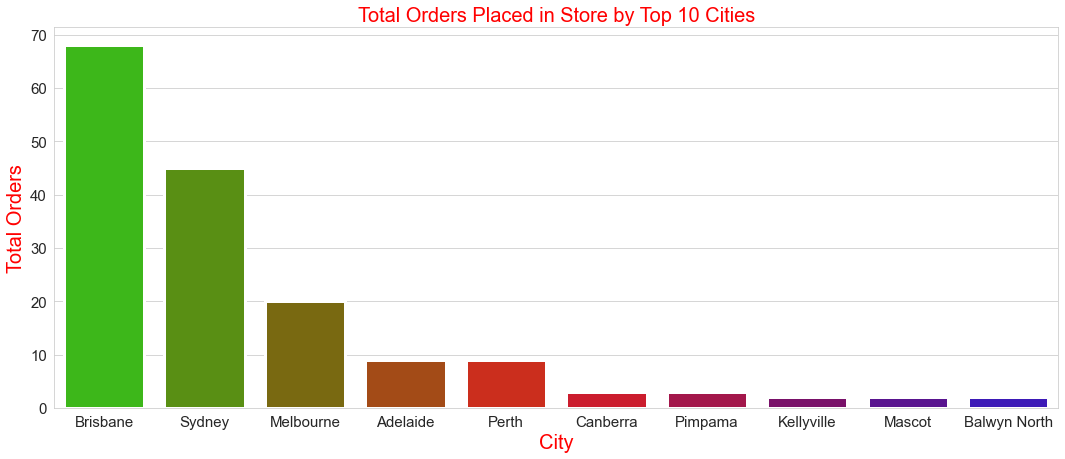

In [42]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = oc, palette = "brg_r", linewidth = 3)
plt.title("Total Orders Placed in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Orders", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Page Views on Store by top 10 cities

In [43]:
pv = df.groupby("location_city")["total_pageviews"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
pv = pv[:10]
pv

,location_city,sum
175,Brisbane,25773
1092,Sydney,13216
733,Melbourne,8151
10,Adelaide,3343
909,Perth,2992
663,Lockport,2587
225,Canberra,751
311,Council Bluffs,623
939,Pune,452
249,Caulfield South,428


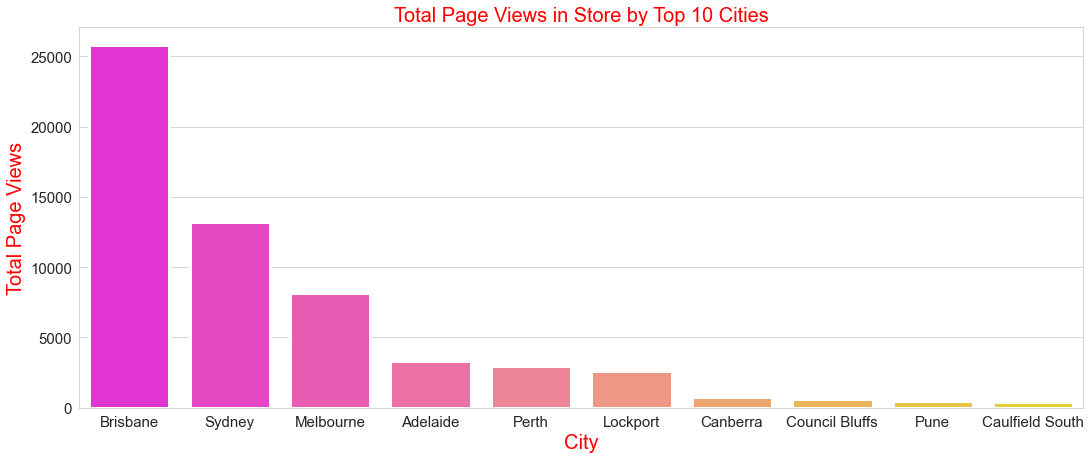

In [44]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = pv, palette = "spring", linewidth = 3)
plt.title("Total Page Views in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Page Views", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Total Visitors on Store by top 10 cities

In [45]:
vc = df.groupby("location_city")["total_visitors"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
vc = vc[:10]
vc

,location_city,sum
175,Brisbane,9092.0
1092,Sydney,7096.0
733,Melbourne,4573.0
10,Adelaide,2119.0
909,Perth,1907.0
311,Council Bluffs,605.0
225,Canberra,424.0
827,New York,342.0
663,Lockport,336.0
883,Oxford House,264.0


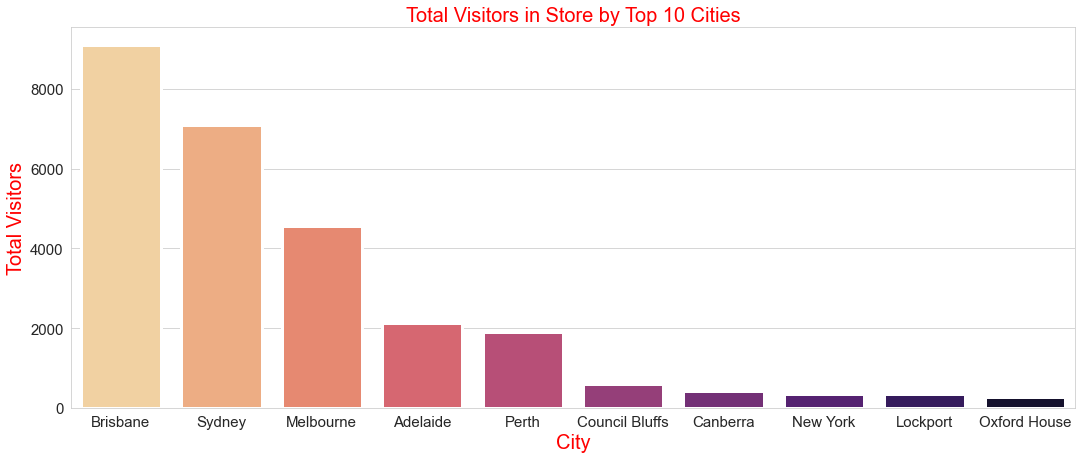

In [46]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "location_city", y = "sum", data = vc, palette = "magma_r", linewidth = 3)
plt.title("Total Visitors in Store by Top 10 Cities", size = 20, color = "red")
plt.xlabel("City", size = 20, color = "red")
plt.ylabel("Total Visitors", size = 20, color = "red")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Goals Completion Forecasting

In [47]:
g = pd.read_csv("Goals.csv")
g[:5]

,Day_Index,Goal_Completions
0,5/1/2021,0
1,5/2/2021,0
2,5/3/2021,0
3,5/4/2021,0
4,5/5/2021,0


In [48]:
g["Day_Index"] = pd.to_datetime(g['Day_Index'])
g[:5]

,Day_Index,Goal_Completions
0,2021-05-01,0
1,2021-05-02,0
2,2021-05-03,0
3,2021-05-04,0
4,2021-05-05,0


In [49]:
g["Month"] = g["Day_Index"].dt.month
g[:5]

,Day_Index,Goal_Completions,Month
0,2021-05-01,0,5
1,2021-05-02,0,5
2,2021-05-03,0,5
3,2021-05-04,0,5
4,2021-05-05,0,5


In [50]:
mg = g.groupby("Month")["Goal_Completions"].agg(["mean"]).reset_index()
mg.columns = ["Month", "Goals"]
mg

,Month,Goals
0,5,0.000000
1,6,29.100000
2,7,47.967742
3,8,72.806452
4,9,70.533333


### Average Goals Completion Forecasting

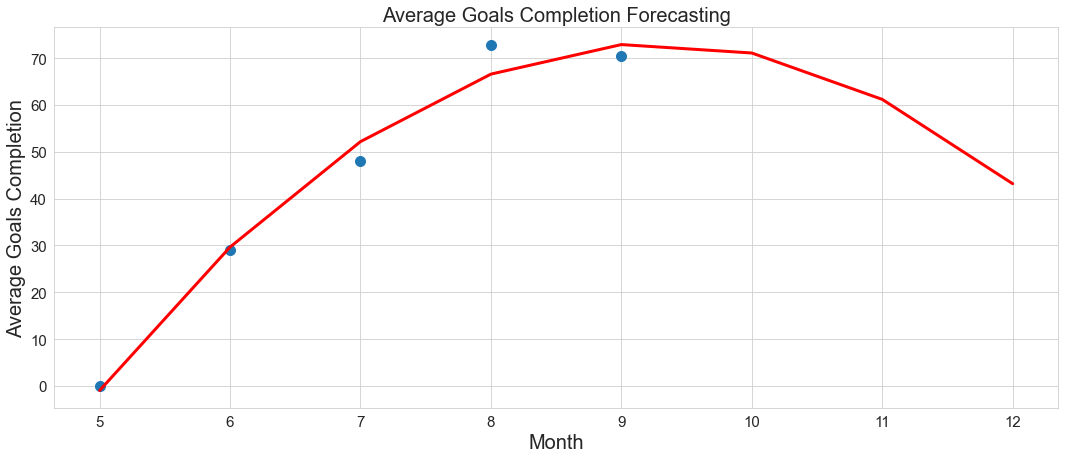

In [51]:
X = mg["Month"]
y = mg["Goals"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 2))
myline = np.array(range(5, 13))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Average Goals Completion Forecasting", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Goals Completion", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Revenue and Ecommerce Conversion Rate

In [52]:
re = pd.read_csv("revenue_conversion.csv")
re[:5]

,Day Index,Revenue,Ecommerce Conversion Rate
0,5/1/2021,0.0,0.0
1,5/2/2021,0.0,0.0
2,5/3/2021,0.0,0.0
3,5/4/2021,0.0,0.0
4,5/5/2021,0.0,0.0


In [53]:
re["Day Index"] = pd.to_datetime(re["Day Index"]) 

In [54]:
re["Month"] = re["Day Index"].dt.month

In [55]:
rem = re.groupby("Month")[["Revenue", "Ecommerce Conversion Rate"]].agg(["mean"]).reset_index()
rem.columns = ["Month", "Revenue", "Ecommerce Conversion Rate"]
rem

,Month,Revenue,Ecommerce Conversion Rate
0,5.0,18.488387,0.001290
1,6.0,288.770000,0.001333
2,7.0,280.073871,0.005161
3,8.0,576.186774,0.008065
4,9.0,1266.704000,0.009333


### Revenue Prediction

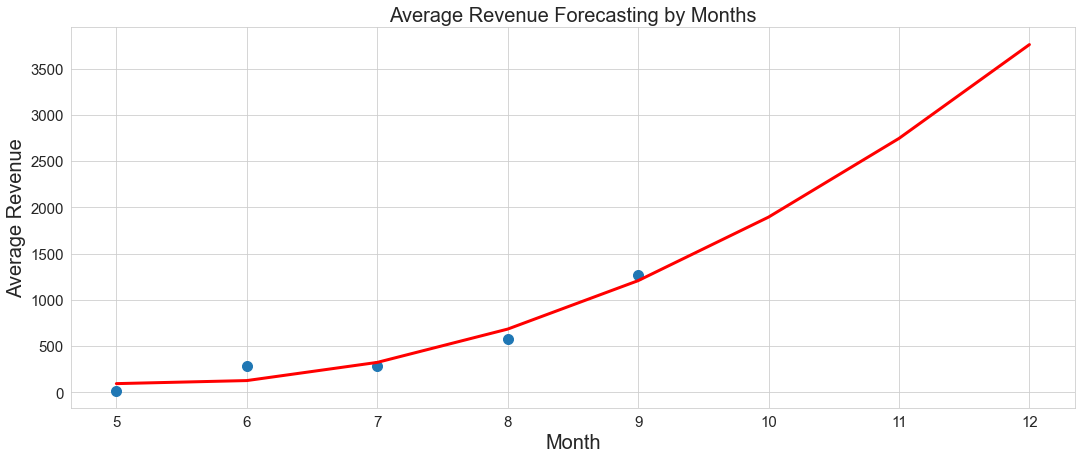

In [56]:
X = rem["Month"]
y = rem["Revenue"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 2))
myline = np.array(range(5, 13))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Average Revenue Forecasting by Months", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Revenue", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Ecommerce Concersion Rate Prediction

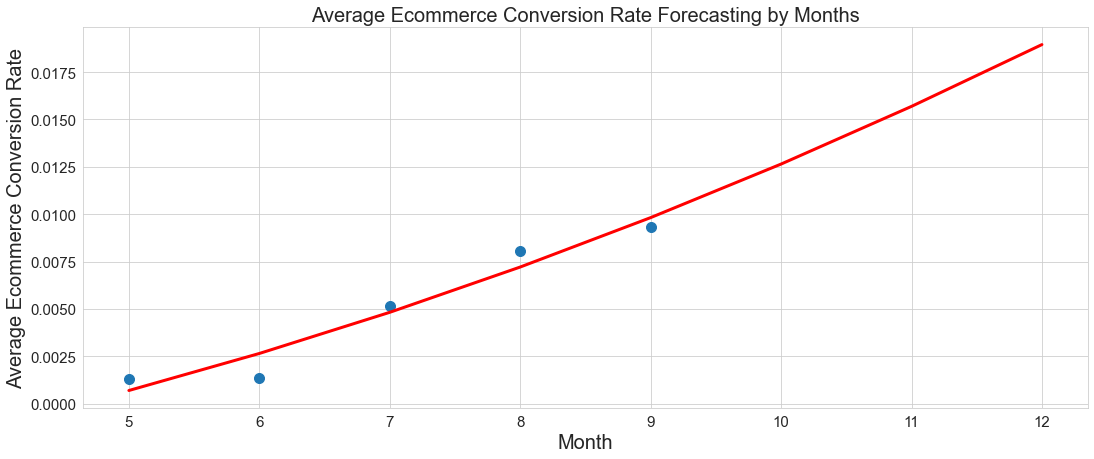

In [57]:
X = rem["Month"]
y = rem["Ecommerce Conversion Rate"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 2))
myline = np.array(range(5, 13))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Average Ecommerce Conversion Rate Forecasting by Months", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Ecommerce Conversion Rate", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Product Revenue Forecasting

In [58]:
pr = pd.read_csv("product_revenue.csv")
pr[:5]

,Day Index,Product Revenue
0,5/1/2021,A$0.00
1,5/2/2021,A$0.00
2,5/3/2021,A$0.00
3,5/4/2021,A$0.00
4,5/5/2021,A$0.00


In [59]:
pr["Product Revenue"]= pr["Product Revenue"].replace({'\$': '', 'A': ''}, regex=True)

In [60]:
pr["Product Revenue"] = pr["Product Revenue"].astype("float")

In [61]:
pr["Day Index"] = pd.to_datetime(pr["Day Index"])
pr["Month"] = pr["Day Index"].dt.month

In [62]:
prm = pr.groupby("Month")["Product Revenue"].agg(["mean"]).reset_index()
prm.columns = ["Month", "Product Revenue"]
prm[:5]

,Month,Product Revenue
0,5,19.933226
1,6,273.009333
2,7,277.890323
3,8,560.269355
4,9,1236.057333


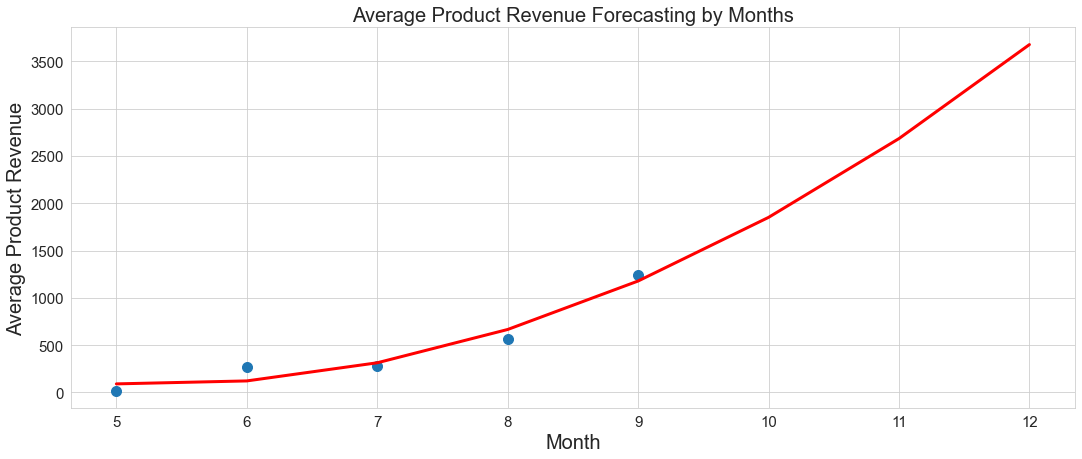

In [63]:
X = prm["Month"]
y = prm["Product Revenue"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 2))
myline = np.array(range(5, 13))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Average Product Revenue Forecasting by Months", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Product Revenue", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Average Sales Performance Prediction

In [64]:
sp = pd.read_csv("sales_performance.csv")
sp[:5]

,Day Index,Revenue
0,5/1/2021,A$0.00
1,5/2/2021,A$0.00
2,5/3/2021,A$0.00
3,5/4/2021,A$0.00
4,5/5/2021,A$0.00


In [65]:
sp["Revenue"]= sp["Revenue"].replace({'\$': '', 'A': ''}, regex=True)

In [66]:
sp["Revenue"] = sp["Revenue"].astype("float")

In [67]:
sp["Day Index"] = pd.to_datetime(sp["Day Index"])
sp["Month"] = sp["Day Index"].dt.month

In [68]:
spm = sp.groupby("Month")["Revenue"].agg(["mean"]).reset_index()
spm.columns = ["Month", "Revenue"]
spm[:5]

,Month,Revenue
0,5,18.488387
1,6,288.770000
2,7,280.073871
3,8,576.186774
4,9,1266.704000


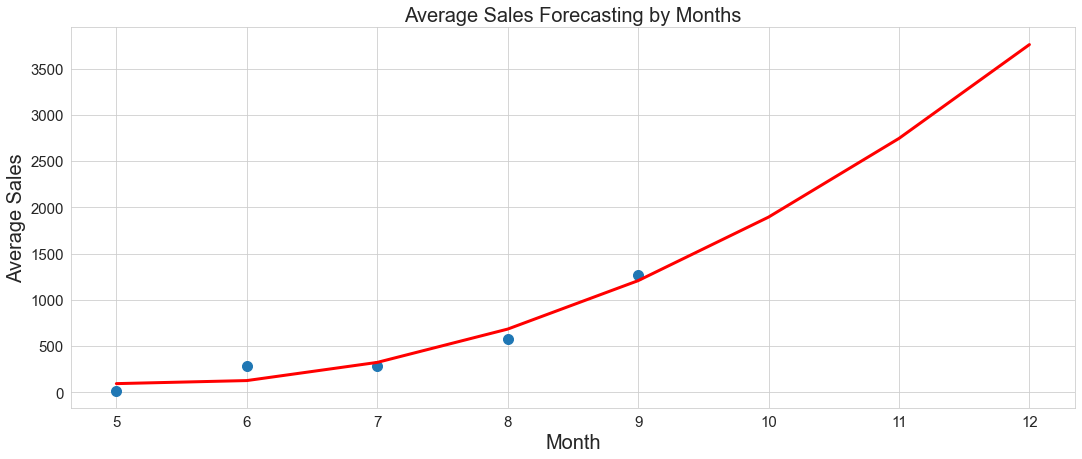

In [69]:
X = spm["Month"]
y = spm["Revenue"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 2))
myline = np.array(range(5, 13))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Average Sales Forecasting by Months", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [73]:
sp5 = sp.groupby("Month")["Revenue"].agg(["sum"]).reset_index()
sp5.columns = ["Month", "Revenue"]
sp5[:5]

,Month,Revenue
0,5,573.14
1,6,8663.10
2,7,8682.29
3,8,17861.79
4,9,19000.56


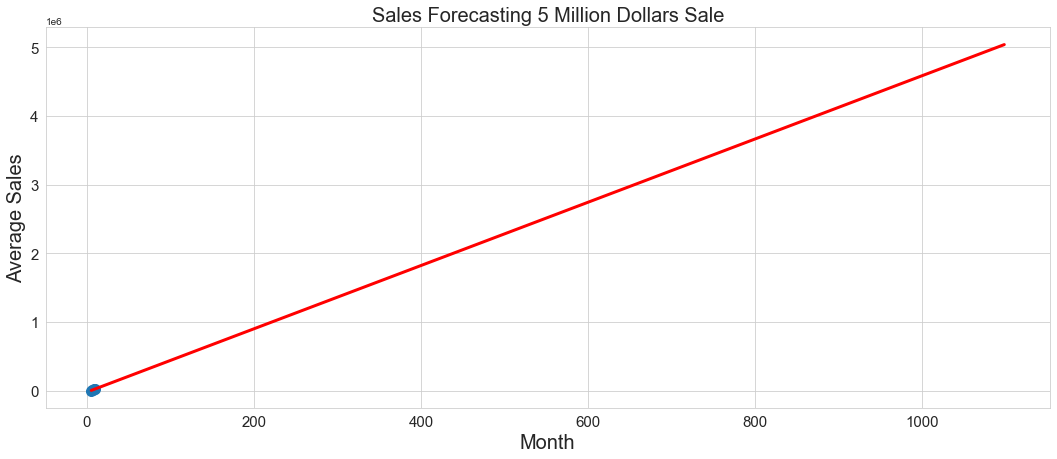

In [81]:
X = sp5["Month"]
y = sp5["Revenue"]

plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 1))
myline = np.array(range(5, 1100))
plt.scatter(X, y, s = 100)
plt.plot(myline, mymodel(myline), "r", linewidth = 3)
plt.title("Sales Forecasting 5 Million Dollars", size = 20)
plt.xlabel("Month", size = 20)
plt.ylabel("Average Sales", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()